In [187]:
# !unzip /content/egphotelbookings.zip 

**You are working for a company that is responsible for coming up with marketing campaigns for hotels.
Data has been collected to show the booking details from 2018 and 2019 of 2 successful hotels in Egypt,
including different details about the customers and the services requested.**

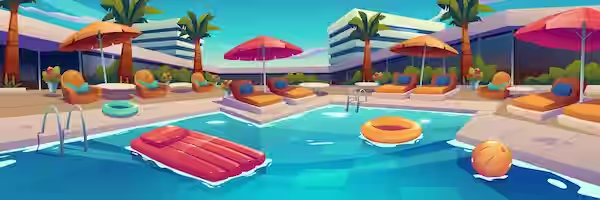

>imports


In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

> Reading dataframe

In [189]:
df =  pd.read_csv('egphotelbookings.csv')

In [190]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Renaissance Hotel,0,342,2018,July,27,1,0,0,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,1,Renaissance Hotel,0,737,2018,July,27,1,0,0,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,2,Renaissance Hotel,0,7,2018,July,27,1,0,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,3,Renaissance Hotel,0,13,2018,July,27,1,0,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,4,Renaissance Hotel,0,14,2018,July,27,1,0,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


create new col for date

In [191]:
# # Assuming the DataFrame is named "df"
# df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str)
#                                     + ' ' + df['arrival_date_month']
#                                     + ' ' + df['arrival_date_day_of_month'].astype(str), 
#                                     errors='coerce')

# # Optional: If you want to keep only the date portion without the time
# df['arrival_date'] = df['arrival_date'].dt.date

##  Data cleaning & engineering 
Perform any necessary data cleaning & engineering that renders your data useable (i.e. handling
missing values, duplicates, classification, transformation...etc.)


In [192]:
df.shape

(119390, 30)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

In [194]:
null_counts = df.isnull().sum()
null_counts

Unnamed: 0                             0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

>company we need to handel company and agent null values as we have aready small 
dataset and cant drop 6921 or more columns from 7326

AGENT -----> ID of the travel agency that made the booking

COMPANY ----> ID of the company/entity that made the booking or responsible
for paying the booking. ID is presented instead of designation for

In [195]:
df.drop(['agent', 'company','Unnamed: 0'], axis=1, inplace=True)

In [196]:
df.dropna(subset=['children','country',], inplace=True)

In [197]:
# check after handling missing values for both columns
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [198]:
df.shape

(118898, 27)

## Insights
Derive 3 insights about attributes from the dataset using appropriate visualizations

https://scikit-learn.org/stable/index.html

https://matplotlib.org/stable/users/index.html

<ipython-input-199-eb13ab8796f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


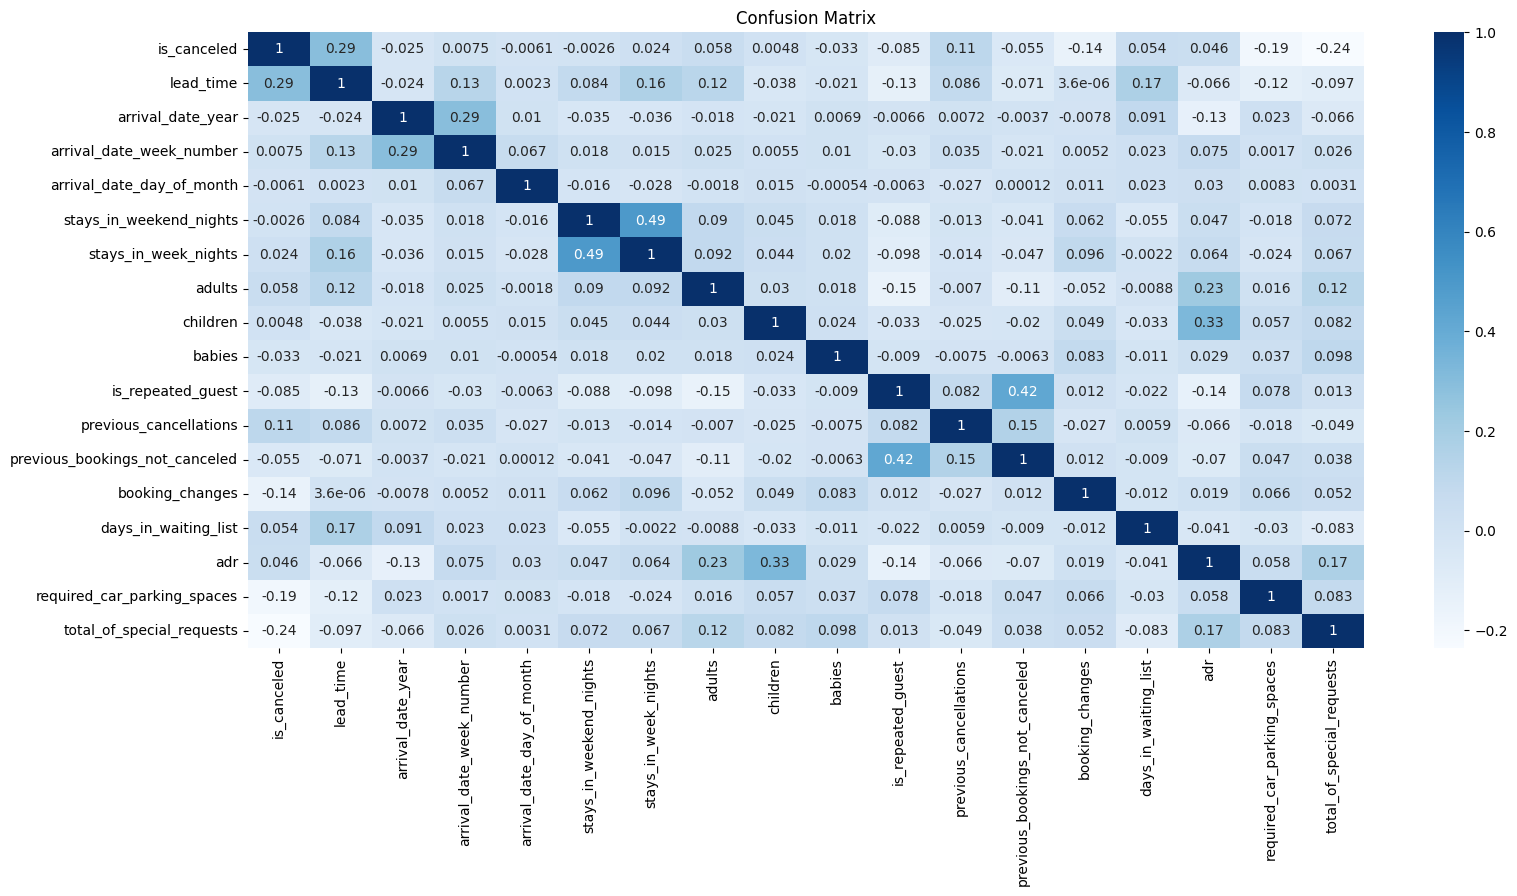

In [199]:
correlation_matrix = df.corr()

# Assuming you have a confusion matrix stored in a variable named 'confusion_matrix'
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

> Insight 1

lead_time: Number of days that elapsed between the entering date of the
booking into the PMS and the arrival date

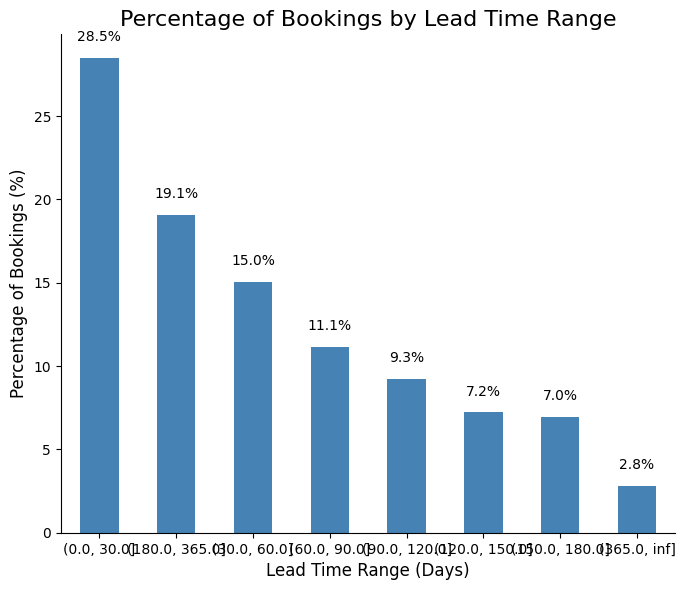

In [200]:
# Calculate the percentage of bookings made within different lead time ranges
lead_time_ranges = [0, 30, 60, 90, 120, 150, 180, 365, float('inf')]
lead_time_counts = pd.cut(df['lead_time'], lead_time_ranges).value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(7, 6))
lead_time_counts.plot(kind='bar', ax=ax, color='steelblue')

plt.title('Percentage of Bookings by Lead Time Range', fontsize=16)
plt.xlabel('Lead Time Range (Days)', fontsize=12)
plt.ylabel('Percentage of Bookings (%)', fontsize=12)

plt.xticks(rotation=0)
plt.yticks(fontsize=10)
for i, v in enumerate(lead_time_counts.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()


> Insight 2


Average Daily Rate by Month (Line Chart)

adr: Average Daily Rate as defined by dividing the sum of all lodging
transactions by the total number of staying nights

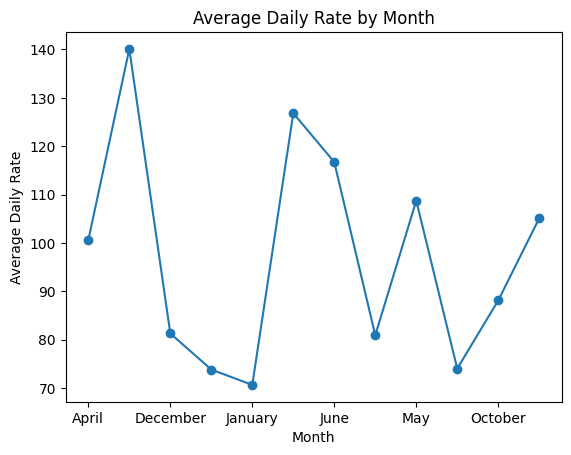

In [201]:
# Insight 2: Average Daily Rate by Month
# Group the data by month, calculate the average (mean) daily rate
monthly_adr = df.groupby('arrival_date_month')['adr'].mean()
monthly_adr.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate by Month')
plt.show()

> Insight 3 Room type popularity

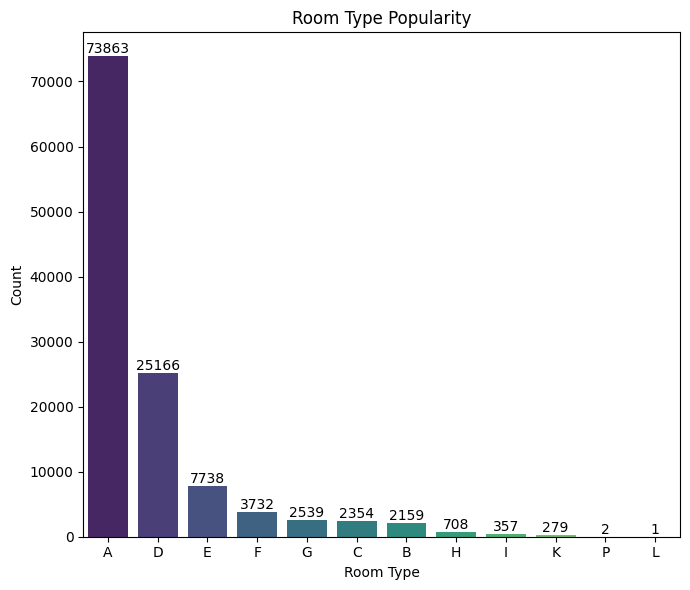

In [202]:
df_room_count = df.groupby("assigned_room_type").size().sort_values(ascending=False)

plt.figure(figsize=(7, 6))
sns.barplot(x=df_room_count.index, y=df_room_count.values, palette="viridis")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Room Type Popularity")

# adding label for each bar with count
for i, count in enumerate(df_room_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Createing a spark context class

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.SparkSession.html

In [203]:
# Installing required packages
# !pip install pyspark
# !pip install findspark

In [204]:
import pandas as pd
from pyspark.sql.types import *
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, udf, avg, concat, lit ,sum, count, when
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier


In [205]:
# Creating a spark context class
# sc = SparkContext()  # uncomm this line in first run

# Creating a spark session
spark = SparkSession \
    .builder \
    .appName("Python Spark DataFrames basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [206]:
df_spark = spark.createDataFrame(df)
df_spark.createOrReplaceTempView("df")

## Promotions using pysprak DataFrame

Come up with 3 promotions to offer per hotel (must be supported by results of queries of your own
creation)


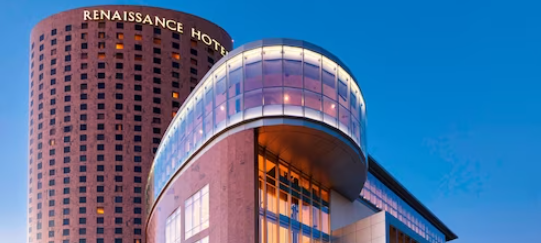

> a) Weekend Getaway Special

promotion is based on the average rate of weekend stays and can attract more guests to book weekend getaways at the Renaissance Hotel

Calculate the average rate for weekend stays

Apply discount for weekend stays

In [207]:
weekend_avg_rate = df_spark.filter((col("hotel") == "Renaissance Hotel") & (col("stays_in_weekend_nights") > 0)) \
.agg({"adr": "avg"}).first()[0]

weekend_discount = 0.2
weekend_getaway_special = df_spark.withColumn("discounted_rate", when((col("hotel") == "Renaissance Hotel") & (col("stays_in_weekend_nights") > 0),
                                                                      col("adr") * (1 - weekend_discount)).otherwise(col("adr")))
weekend_getaway_special.show() # col -----> discounted_rate

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+-------------+------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|total_of_special_requests|discounted_rate|
+-----------------+-----------+---

> b)Create family vacation package with breakfast and discount 10%

Calculate the average number of adults and babies per booking

In [208]:
avg_guests = df_spark.groupBy("hotel").agg(avg("adults").alias("avg_adults"),
                                           avg("babies").alias("avg_babies"))

family_vacation_package = df_spark.join(avg_guests, "hotel") \
    .withColumn("package_rate",
                when((col("adults") + col("babies")) > 0,
                     col("adr") * 0.9)
                .otherwise(col("adr"))) \
    .withColumn("package_description",
                concat(lit("Breakfast and 10% discount on stays with childrens")))

family_vacation_package.show() # cols -----> package_rate for the percentage and package_description

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+-------------+------+---------------------------+-------------------------+------------------+--------------------+------------------+--------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|total_of_spec

> c) Group free wifi package

In [209]:
unique_customer_types = df_spark.select("customer_type").distinct()
unique_customer_types.show()

+---------------+
|  customer_type|
+---------------+
|      Transient|
|Transient-Party|
|          Group|
|       Contract|
+---------------+



In [210]:
business_traveler_package = df_spark.filter((col("hotel") == "Renaissance Hotel") & (col("customer_type") == "Group"))

business_traveler_package = business_traveler_package.withColumn("offer_description",when((col("hotel") == "Renaissance Hotel") & (col("customer_type") == "Group"),
                                                                      "free group wifi, and Complimentary Breakfast").otherwise(""))

business_traveler_package.show() # col -------> offer_description for groups only

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+-------------+-----+---------------------------+-------------------------+--------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|days_in_waiting_list|customer_type|  adr|required_car_parking_spaces|total_of_special_requests|   offer_description|
+-----------------+-------


--------------------------------------------------------------------------------


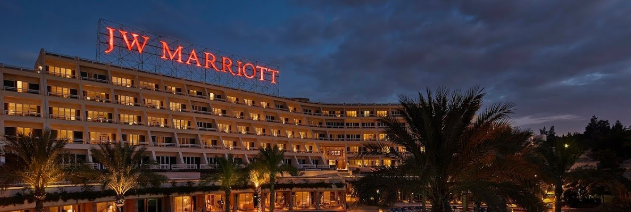

>a) Apply extended stay discount for bookings with 5 or more nights

In [211]:
extended_stay_discount = 0.10
extended_stay_promotion = df_spark.withColumn("discounted_rate",
                                              when((col("hotel") == "JW Marriott Hotel") & (col("stays_in_week_nights") >= 5),
                                                   col("adr") * (1 - extended_stay_discount))
                                              .otherwise(col("adr")))

extended_stay_promotion.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+-------------+------+---------------------------+-------------------------+---------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|days_in_waiting_list|customer_type|   adr|required_car_parking_spaces|total_of_special_requests|discounted_rate|
+-----------------+-----------+---

> b) Add honeymoon package description

In [212]:
unique_customer_types = df_spark.select("reserved_room_type").distinct()
unique_customer_types.show()

+------------------+
|reserved_room_type|
+------------------+
|                 F|
|                 E|
|                 B|
|                 L|
|                 D|
|                 C|
|                 A|
|                 G|
|                 H|
|                 P|
+------------------+



In [213]:
from pyspark.sql.functions import col, when

# Identify bookings made by honeymooners
honeymoon_package = df_spark.filter((col("hotel") == "JW Marriott Hotel") & (col("reserved_room_type") == "E"))

honeymoon_package = honeymoon_package.withColumn("package_description",
                                                 when((col("hotel") == "JW Marriott Hotel") & (col("reserved_room_type") == "E"),
                                                      "Honeymoon Package: Enjoy a romantic stay with a special room setup and complimentary champagne.")
                                                      .otherwise(""))

honeymoon_package.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+---------------+-----+---------------------------+-------------------------+--------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|days_in_waiting_list|  customer_type|  adr|required_car_parking_spaces|total_of_special_requests| package_description|
+-----------------+---

> c) Add family fun package amenities

In [214]:
family_fun_package = df_spark.filter((col("hotel") == "JW Marriott Hotel") & (col("adults") > 1) & (col("babies") > 0))

family_fun_package = family_fun_package.withColumn("package_description",when((col("hotel") == "JW Marriott Hotel") & (col("adults") > 0) & (col("babies") > 0),
                                                        " Discounted Rates for Children, Complimentary Kids' Meals, and Access to Kids' Club and Swimming Pool").otherwise(""))

family_fun_package.show()

+-----------------+-----------+---------+-----------------+------------------+------------------------+-------------------------+-----------------------+--------------------+------+--------+------+----+-------+--------------------+-----------------+----------------------+------------------------------+------------------+------------------+---------------+------------+--------------------+---------------+------+---------------------------+-------------------------+--------------------+
|            hotel|is_canceled|lead_time|arrival_date_year|arrival_date_month|arrival_date_week_number|arrival_date_day_of_month|stays_in_weekend_nights|stays_in_week_nights|adults|children|babies|meal|country|distribution_channel|is_repeated_guest|previous_cancellations|previous_bookings_not_canceled|reserved_room_type|assigned_room_type|booking_changes|deposit_type|days_in_waiting_list|  customer_type|   adr|required_car_parking_spaces|total_of_special_requests| package_description|
+-----------------+-

## Models
Using SparkML, produce at least 3 models to predict whether a booking will be canceled or not

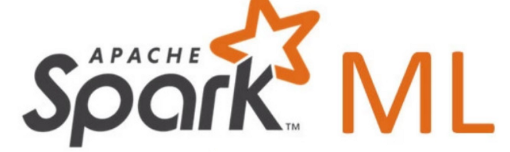

https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa


In [215]:
stages = []

# num columns
numeric_cols = df.select_dtypes(include=['double','integer','long']).columns.tolist()
numeric_cols = numeric_cols[1:]

# categorical columns
categoricalColumns = ['hotel','arrival_date_month','meal','country', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

# string indexing cat columns
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

assemblerInputs = [c + "classVec" for c in categoricalColumns] + numeric_cols

assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

stages += [assembler]

In [216]:
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df_spark)
df_spark = pipelineModel.transform(df_spark)

In [217]:
df_spark.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- is_canceled: long (nullable = true)
 |-- lead_time: long (nullable = true)
 |-- arrival_date_year: long (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: long (nullable = true)
 |-- arrival_date_day_of_month: long (nullable = true)
 |-- stays_in_weekend_nights: long (nullable = true)
 |-- stays_in_week_nights: long (nullable = true)
 |-- adults: long (nullable = true)
 |-- children: double (nullable = true)
 |-- babies: long (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: long (nullable = true)
 |-- previous_cancellations: long (nullable = true)
 |-- previous_bookings_not_canceled: long (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: long (nullable = true)
 |-- deposit_type: string 

In [218]:

train, test = df_spark.randomSplit([0.7, 0.3], seed = 42)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 83316
Test Dataset Count: 35582


>  1)  Random Forest Model


In [219]:
# training RandomForestClassifier
rf = RandomForestClassifier(labelCol="is_canceled", featuresCol="features")
pipeline = Pipeline(stages=[rf])
model = pipeline.fit(train)

predictions = model.transform(test)
evaluator = BinaryClassificationEvaluator(labelCol="is_canceled")
accuracy = evaluator.evaluate(predictions)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 86.85%


>  2)  Logistic Regression Model

In [220]:
# training LogisticRegression
lr = LogisticRegression(labelCol='is_canceled')
lr_model = lr.fit(train)

# Evaluate the model
predictions = lr_model.transform(test)
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='is_canceled')
accuracy = evaluator.evaluate(predictions)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 88.57%


>  3)  Decision Tree Model

In [221]:
# training DecisionTreeClassifier
dt = DecisionTreeClassifier(labelCol='is_canceled')
dt_model = dt.fit(train)

# Evaluate the model
predictions = dt_model.transform(test)
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='is_canceled')
accuracy = evaluator.evaluate(predictions)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 63.19%


so, LogisticRegression have the best accuracy

In [222]:
# spark.stop()

## links

## -------------------------------------------------------------------------------------------------

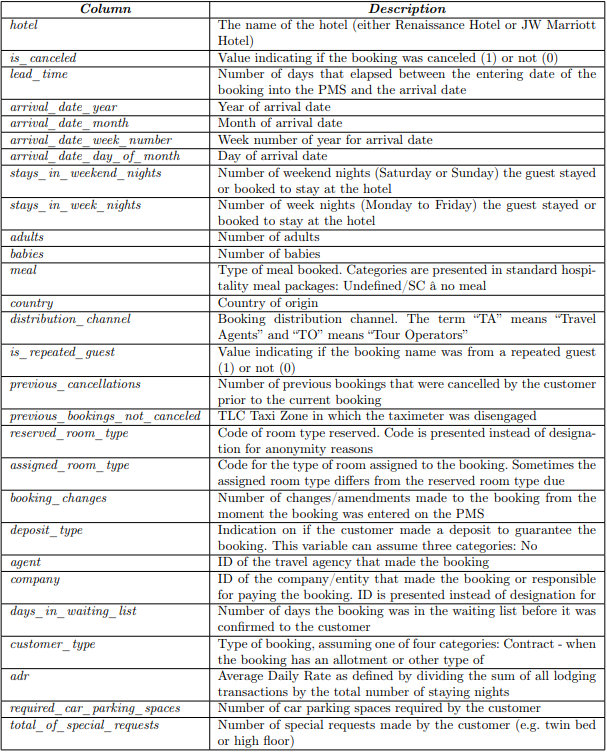

You are allowed to use any of the tools, frameworks and technologies covered throughout
the course.

Deliverables

• Your code is to be submitted to bigdata602@gmail.com as a zip file containing all your work

with subject: “Project” and IDs of the team members in the body of the email).

Note: You need to add the link of every resource you use to write your code.